In [1]:
# This is an example of running the model through a twitch

In [2]:
import json as json
import matplotlib.pyplot as plt
import os

import multifil

imported SRX-enabled multifil


In [3]:
def print_constants(constants, print_address=False):
    for f_type, filaments in constants.items():
        print(f_type)
        for address, filament in filaments.items():
            address = "\t" + str(address)
            if not print_address:
                address = ""
            print(address, "\t", end = "")
            
            for constant, value in filament.items():
                print(constant, "=", value, end=" ")
            if len(filaments.keys()) < 50:
                print()
            else:
                print(", ", end="\t")

In [4]:
hs = multifil.hs.hs()  # Run the model with a_p = 1.0, allowing xb cycling
forces, exit_code = hs.run(10)


MainProcess finished timestep 1 of 10, 0h0m3s left
MainProcess finished timestep 2 of 10, 0h0m1s left
MainProcess finished timestep 3 of 10, 0h0m1s left
MainProcess finished timestep 4 of 10, 0h0m1s left
MainProcess finished timestep 5 of 10, 0h0m1s left
MainProcess finished timestep 6 of 10, 0h0m1s left
MainProcess finished timestep 7 of 10, 0h0m1s left
MainProcess finished timestep 8 of 10, 0h0m0s left
MainProcess finished timestep 9 of 10, 0h0m0s left
MainProcess finished timestep 10 of 10, 0h0m0s left

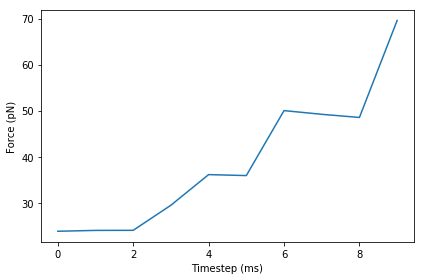

In [5]:
fig, ax = plt.subplots(1,1)
ax.plot(forces)
ax.set(xlabel="Timestep (ms)", ylabel="Force (pN)")
plt.tight_layout()

In [6]:
time_trace = multifil.aws.metas.time_trace(
    .5, # ms per timestep
    500, # ms to run for
                                    )
length_trace = multifil.aws.metas.zline_workloop(
    1200, # resting hs length 
    0, # peak to peak amp 
    1, # cycle freq in Hz 
    time_trace
                                                )

'''init params freq=25, phase=0.1, stim_duration=20, influx_time=2, half_life=10, time=time'''
'''first twitch: 5, 10, 50, 2, 10'''
'''positive workloop params: 25, # freq in Hz, 0.1, # phase offset, 10, # stimulus duration in ms
    2, # time it takes for ca to go from 10 to 90% of influx level, 10, # half life of Ca decay, time_trace'''
# actin_permissiveness_trace = multifil.aws.metas.actin_permissiveness_workloop(
#     1, # freq in Hz 
#     0.01, # phase offset 
#     20, # stimulus duration in ms
#     2, # time it takes for ca to go from 10 to 90% of influx level
#     50, # half life of Ca decay 
#     time_trace)

import treatment_definitions as td
actin_permissiveness_trace = td.sparrow2019AP()

print(len(actin_permissiveness_trace),
     len(time_trace))

1000 1000


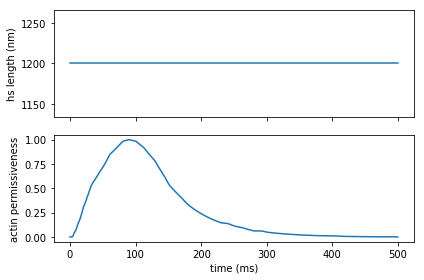

In [7]:
fig, axes = plt.subplots(2,1,sharex=True)
axes[0].plot(time_trace, length_trace)
axes[0].set(ylabel='hs length (nm)')
axes[1].plot(time_trace, actin_permissiveness_trace)
axes[1].set(ylabel='actin permissiveness',
           xlabel='time (ms)')
plt.tight_layout()

In [8]:
output_dir = "../_output/_helloSarcOutput/"

params = {"ti_a":0,
          "mh_c_ks":0.5, "mh_c_kw":0.5, "mh_c_rs":0.5, "mh_c_rw":0.5,
          "mh_g_ks":0.5, "mh_g_kw":0.5, "mh_g_rs":0.5, "mh_g_rw":0.5,}

params = {}

wl_meta = multifil.aws.metas.emit(output_dir, # local dir to save run output to
                                  None, #s3 bucket to upload results to
                                  time_trace, 
                                  0.5, # poisson ratio, set to const vol here
                                 None, # intial ls, using default by passing none
                                 length_trace, 
                                 actin_permissiveness_trace, 
                                 "an example run", # comment describing run
                                 True, # whether to write out resulting file 
                                  #or just pass back to variable
                                 params)
run_name = wl_meta['name']
print(run_name)
run_file = output_dir + run_name + ".meta.json"

bdb19302-d5d1-11ea-8f4c-185680feb82e


In [9]:
for key in wl_meta.keys():
    print(key)
    
print(wl_meta['hs_params'].keys())

name
comment
path_local
path_s3
poisson_ratio
lattice_spacing
z_line
actin_permissiveness
hs_params
timestep_length
timestep_number
dict_keys([])


In [10]:
run_manager = multifil.aws.run.manage(run_file, False) # have run.py create the sarc from meta
# Begin running
_ = run_manager.run_and_save()   # with our new sarc, run it


MainProcess finished timestep 1 of 1000, 0h5m50s left

C:\Users\Anthony\Documents\github\srx_multifil\multifil\ti.py:184: UserWarning: Check radial force direction in titin
  warnings.warn("Check radial force direction in titin")



MainProcess finished timestep 101 of 1000, 0h7m27s left
MainProcess finished timestep 201 of 1000, 0h8m19s left
MainProcess finished timestep 301 of 1000, 0h8m6s left
MainProcess finished timestep 401 of 1000, 0h6m58s left
MainProcess finished timestep 501 of 1000, 0h5m39s left
MainProcess finished timestep 601 of 1000, 0h4m23s left
MainProcess finished timestep 701 of 1000, 0h3m9s left
MainProcess finished timestep 801 of 1000, 0h2m0s left
MainProcess finished timestep 901 of 1000, 0h0m55s leftrun.py MainProcess # ## model finished, uploading
run.py MainProcess # ## uploading finished, done with this run


In [11]:
print(run_name)
data_name = run_file.split('.meta')[0] + '.data.json'

with open(data_name, 'r') as file:
    data = json.load(file)
    
for key in data.keys():
    print(key, end=", ")

bdb19302-d5d1-11ea-8f4c-185680feb82e
actin_permissiveness, axial_force, constants, lattice_spacing, name, radial_force_y, radial_force_z, radial_tension, thick_displace_max, thick_displace_mean, thick_displace_min, thick_displace_std, thin_displace_max, thin_displace_mean, thin_displace_min, thin_displace_std, timestep, timestep_length, xb_fraction_free, xb_fraction_loose, xb_fraction_tight, xb_trans_12, xb_trans_13, xb_trans_21, xb_trans_23, xb_trans_31, xb_trans_32, xb_trans_static, z_line, 

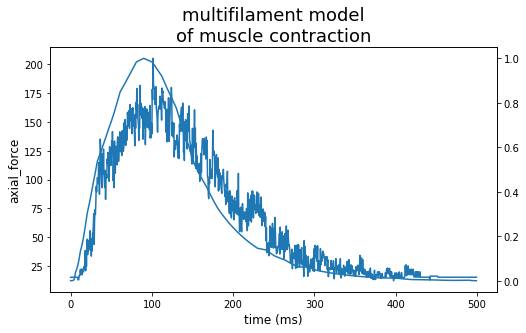

In [12]:
key = "axial_force"
fs = 12

# recreate time trace in milliseconds
time_trace = data['timestep'].copy()
for i in range(len(time_trace)):
    time_trace[i] *= data['timestep_length']

# plot
fig, axes = plt.subplots(figsize=(8, 4.5))
axes.plot(time_trace, data[key])

plt.title("multifilament model\nof muscle contraction", fontsize=fs*1.5)
plt.xlabel("time (ms)", fontsize=fs)
plt.ylabel(key, fontsize=fs)

ax2 = plt.twinx()
ax2.plot(time_trace, data['actin_permissiveness'])

save = False # OI! make sure that this is set correctly, will eat up filespace if always saving
if save:
    plt.savefig(output_dir + str(run_name) + "png")

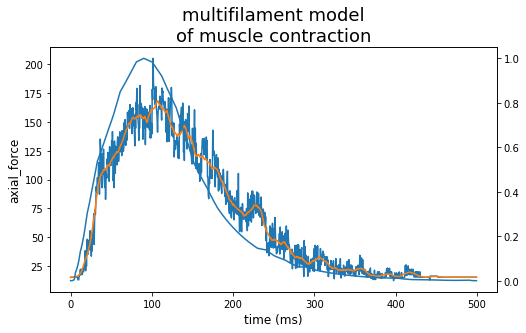

In [13]:
s_time, s_force = td.naiveLineSmoothing(time_trace, data['axial_force'], bin_size=25)

# plot
fig, axes = plt.subplots(figsize=(8, 4.5))
axes.plot(time_trace, data[key])

plt.title("multifilament model\nof muscle contraction", fontsize=fs*1.5)
plt.xlabel("time (ms)", fontsize=fs)
plt.ylabel(key, fontsize=fs)

ax2 = plt.twinx()
ax2.plot(time_trace, data['actin_permissiveness'])

axes.plot(s_time, s_force)

In [14]:
print_constants(data['constants'])

af
 	af_k = 1743 
 	af_k = 1743 
 	af_k = 1743 
 	af_k = 1743 
 	af_k = 1743 
 	af_k = 1743 
 	af_k = 1743 
 	af_k = 1743 
mf
 	mf_k = 2020 
 	mf_k = 2020 
 	mf_k = 2020 
 	mf_k = 2020 
mh


 	detachment_rate = original mh_c_ks = 40 mh_c_kw = 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.8230972752405258 mh_fd_delta = 1.3 mh_fd_k0 = 0.10200000000000001 mh_g_ks = 2 mh_g_kw = 2 mh_g_rs = 16.47 mh_g_rw = 19.93 , 	 	detachment_rate = original mh_c_ks = 40 mh_c_kw = 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.8230972752405258 mh_fd_delta = 1.3 mh_fd_k0 = 0.10200000000000001 mh_g_ks = 2 mh_g_kw = 2 mh_g_rs = 16.47 mh_g_rw = 19.93 , 	 	detachment_rate = original mh_c_ks = 40 mh_c_kw = 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.8230972752405258 mh_fd_delta = 1.3 mh_fd_k0 = 0.10200000000000001 mh_g_ks = 2 mh_g_kw = 2 mh_g_rs = 16.47 mh_g_rw = 19.93 , 	 	detachment_rate = original mh_c_ks = 40 mh_c_kw = 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.8230972752405258 mh_fd_delta = 1.3 mh_fd_k0 = 0.10200000000000001 mh_g_ks = 2 mh_g_kw = 2 mh_g_rs = 16.47 mh_g_rw = 19.93 , 	 	detachment_rate = original mh_c_ks = 40 mh_c_kw = 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.8230972752405258 mh_

19.93 , 	 	detachment_rate = original mh_c_ks = 40 mh_c_kw = 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.8230972752405258 mh_fd_delta = 1.3 mh_fd_k0 = 0.10200000000000001 mh_g_ks = 2 mh_g_kw = 2 mh_g_rs = 16.47 mh_g_rw = 19.93 , 	 	detachment_rate = original mh_c_ks = 40 mh_c_kw = 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.8230972752405258 mh_fd_delta = 1.3 mh_fd_k0 = 0.10200000000000001 mh_g_ks = 2 mh_g_kw = 2 mh_g_rs = 16.47 mh_g_rw = 19.93 , 	 	detachment_rate = original mh_c_ks = 40 mh_c_kw = 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.8230972752405258 mh_fd_delta = 1.3 mh_fd_k0 = 0.10200000000000001 mh_g_ks = 2 mh_g_kw = 2 mh_g_rs = 16.47 mh_g_rw = 19.93 , 	 	detachment_rate = original mh_c_ks = 40 mh_c_kw = 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.8230972752405258 mh_fd_delta = 1.3 mh_fd_k0 = 0.10200000000000001 mh_g_ks = 2 mh_g_kw = 2 mh_g_rs = 16.47 mh_g_rw = 19.93 , 	 	detachment_rate = original mh_c_ks = 40 mh_c_kw = 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.82309727524

mh_fd_delta = 1.3 mh_fd_k0 = 0.10200000000000001 mh_g_ks = 2 mh_g_kw = 2 mh_g_rs = 16.47 mh_g_rw = 19.93 , 	 	detachment_rate = original mh_c_ks = 40 mh_c_kw = 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.8230972752405258 mh_fd_delta = 1.3 mh_fd_k0 = 0.10200000000000001 mh_g_ks = 2 mh_g_kw = 2 mh_g_rs = 16.47 mh_g_rw = 19.93 , 	 	detachment_rate = original mh_c_ks = 40 mh_c_kw = 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.8230972752405258 mh_fd_delta = 1.3 mh_fd_k0 = 0.10200000000000001 mh_g_ks = 2 mh_g_kw = 2 mh_g_rs = 16.47 mh_g_rw = 19.93 , 	 	detachment_rate = original mh_c_ks = 40 mh_c_kw = 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.8230972752405258 mh_fd_delta = 1.3 mh_fd_k0 = 0.10200000000000001 mh_g_ks = 2 mh_g_kw = 2 mh_g_rs = 16.47 mh_g_rw = 19.93 , 	 	detachment_rate = original mh_c_ks = 40 mh_c_kw = 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.8230972752405258 mh_fd_delta = 1.3 mh_fd_k0 = 0.10200000000000001 mh_g_ks = 2 mh_g_kw = 2 mh_g_rs = 16.47 mh_g_rw = 19.93 , 	 	detach

 mh_c_kw = 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.8230972752405258 mh_fd_delta = 1.3 mh_fd_k0 = 0.10200000000000001 mh_g_ks = 2 mh_g_kw = 2 mh_g_rs = 16.47 mh_g_rw = 19.93 , 	 	detachment_rate = original mh_c_ks = 40 mh_c_kw = 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.8230972752405258 mh_fd_delta = 1.3 mh_fd_k0 = 0.10200000000000001 mh_g_ks = 2 mh_g_kw = 2 mh_g_rs = 16.47 mh_g_rw = 19.93 , 	 	detachment_rate = original mh_c_ks = 40 mh_c_kw = 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.8230972752405258 mh_fd_delta = 1.3 mh_fd_k0 = 0.10200000000000001 mh_g_ks = 2 mh_g_kw = 2 mh_g_rs = 16.47 mh_g_rw = 19.93 , 	 	detachment_rate = original mh_c_ks = 40 mh_c_kw = 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.8230972752405258 mh_fd_delta = 1.3 mh_fd_k0 = 0.10200000000000001 mh_g_ks = 2 mh_g_kw = 2 mh_g_rs = 16.47 mh_g_rw = 19.93 , 	 	detachment_rate = original mh_c_ks = 40 mh_c_kw = 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.8230972752405258 mh_fd_delta = 1.3 mh_fd_k0 = 0.1020000000000

 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.8230972752405258 mh_fd_delta = 1.3 mh_fd_k0 = 0.10200000000000001 mh_g_ks = 2 mh_g_kw = 2 mh_g_rs = 16.47 mh_g_rw = 19.93 , 	 	detachment_rate = original mh_c_ks = 40 mh_c_kw = 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.8230972752405258 mh_fd_delta = 1.3 mh_fd_k0 = 0.10200000000000001 mh_g_ks = 2 mh_g_kw = 2 mh_g_rs = 16.47 mh_g_rw = 19.93 , 	 	detachment_rate = original mh_c_ks = 40 mh_c_kw = 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.8230972752405258 mh_fd_delta = 1.3 mh_fd_k0 = 0.10200000000000001 mh_g_ks = 2 mh_g_kw = 2 mh_g_rs = 16.47 mh_g_rw = 19.93 , 	 	detachment_rate = original mh_c_ks = 40 mh_c_kw = 40 mh_c_rs = 1.2775810124598492 mh_c_rw = 0.8230972752405258 mh_fd_delta = 1.3 mh_fd_k0 = 0.10200000000000001 mh_g_ks = 2 mh_g_kw = 2 mh_g_rs = 16.47 mh_g_rw = 19.93 , 	ti
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.00

In [15]:
# how does run.py make a sarcomere?
new_sarc = multifil.hs.hs(ti_a=89)